##  Homework 3 - Problem 5 : Bernoulli mixtures for mnist

### Student: Dimitrios Tanoglidis

First import some packages

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Import the MNIST dataset

I downloaded the MNIST data set, which is actually consisted  out of a training set ($\sim 60000$ images) and a test set ($\sim 10000$ images). 



In [2]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_images.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_images.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_labels.npy"))


# Print their shapes to see
print(np.shape(data_train));print(np.shape(labels_train))
# Print their shapes to see
print(np.shape(data_test));print(np.shape(labels_test))

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


### Part 1: Warm-up - case M = 1

As a warm-up, I will first consider the case with $M = 1$, where there is no need to use the EM algorithm.

The training set is consisted of $60000$ data vectors of size 784; each one can be rshaped as a $28 \times 28$ matrix, representing a handwritten digit. 

The total likelihood for one data point is:

\begin{equation}
L(p) = \prod_{j=1}^{784} p_j^{x_j}(1 - p_j)^{(1-x_j)}
\end{equation}

The ML estimator of each one of the 784 parameters $p_j$, if we assume that we have $n$ observations is (from problem 5):

\begin{equation}
\boxed{
\hat{p}_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}, \quad j=1,\dots,784} 
\end{equation}

Now, we have ten differenct classes (ten different digits). 

For $\mathbf{each}$ class:

-  Calculate a vector (of length $784$) of the parameter estimates $\hat{p}_j$.

-  Reshape  the parameter vector as an $28 \times 28$ array and plot as an image.

After having the parameter vectors for the ten classes, for each data point from the test set, calculate the (log) likelihood $L(p)$ to belong in any of the ten classes.

- Assign the data point to the class that has the maximum likelihood (here we assume equal prior for all classes).


In [10]:
# Binarize data - set anything that is larger than zero equal to one
data_train[data_train>0.0] = 1.0
data_test[data_test>0.0] = 1.0

# Initialize a matrix that contains the parameters p_j 
# For each of the classes 0, 1, ...., 9

p_params = np.zeros([10,784])

Let's populate the vectors now...

In [52]:
for i in range(10):
    # Work for each one of the classes 0, 1, ..., 9
    i_fl = float(i)
    
    
    for j in range(784):
        data_j = data_train[:,j]
        #Select those data points belonging to the i-th class
        i_sel = (labels_train==i_fl)[:,0]
        data_ith_class = data_j[i_sel]
        # Calculate the mean - that is parameter p_j
        p_params[i,j] = np.mean(data_ith_class)

Let's plot the vectors and see the images

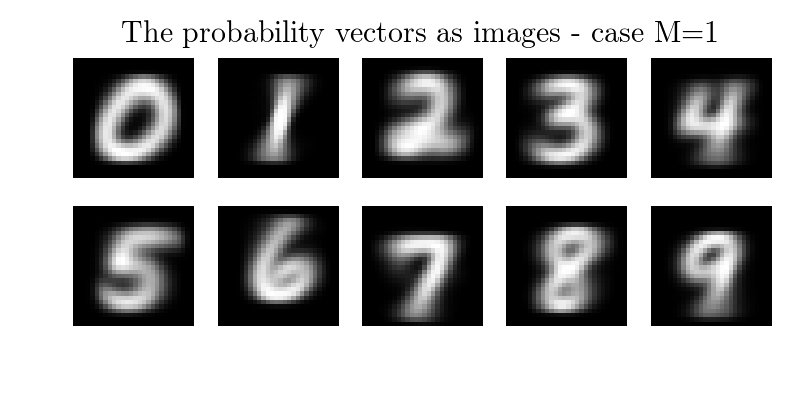

In [57]:
nrows = 2
ncols = 5

plt.figure(figsize=(ncols*0.9, nrows*0.9))

for i in xrange(nrows*ncols):
    if (i==3):
        plt.title("The probability vectors as images - case M=1")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(p_params[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

We see that these probability vectors are somehow the  means of all data points.

Let's move on now to the classification part.

In [130]:
# Function that, for a data vector x, calculates the likelihood of each class and assigns
# it to the class with the maximum likelihood

def ML_return(x):
    """
    Returns the class with the maximum likelihood
    
    Input: Vector x
    Output : Class (0-9)
    """
    
    # Initilize the log-likelihoods of the ten categories
    Like = np.zeros(10)
    
    for i in range(10):
        log_p = np.log(p_params[i]+1e-30)
        log_p_1 = np.log(1 - p_params[i])
        
        Like[i] = np.sum(x*log_p + (1.0-x)*log_p_1)
        
    #Calculate maxlimum likelihood
    ML = np.max(Like)
    
    # Class - > where is the ML
    class_is = float(np.where(Like==ML)[0])
    
    return class_is
        

Let's predict the labels of the training set now.

In [131]:
Labels_predict = np.zeros(10000)

for i in range(10000):
    Labels_predict[i] = ML_return(data_test[i])

Let's plot some digits together with their predictions...

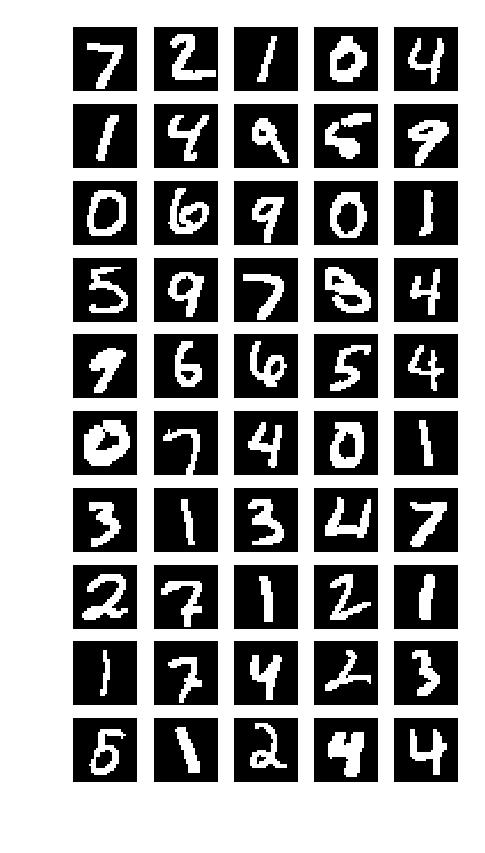

In [132]:
# Eigenvectors are the columnts of the matrix
data_test_plot = (data_test)[0:50,:]
labels_pred = Labels_predict[0:50]
nrows = 10
ncols = 5

plt.figure(figsize=(ncols*0.5, nrows*0.5))

for i in xrange(nrows*ncols):
    
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(data_test_plot[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

In [133]:
print(labels_pred)

[7. 2. 1. 0. 4. 1. 4. 9. 4. 9. 0. 6. 9. 0. 1. 3. 9. 7. 3. 4. 9. 6. 4. 5.
 4. 0. 7. 4. 0. 1. 3. 1. 3. 0. 7. 2. 7. 1. 3. 1. 1. 7. 4. 2. 3. 5. 3. 2.
 9. 4.]


We see that some predictions are correct, while some else not. We can use some metrics from scikit learn to check.

In [134]:
from sklearn.metrics import accuracy_score

# Let's print the accuracy score
print(accuracy_score(labels_test[:,0],Labels_predict))

0.8419


We see that with this simple classification we have $\sim 84 \%$ accuracy. Not bad, but let's see if we can improve that score when adding more clusters (cases with M=3,5).